In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os
import warnings


In [33]:

# Suppressing the warning
warnings.filterwarnings("ignore", category=UserWarning)


In [25]:
# Load the dataset
data = pd.read_csv('C:/Users/SHYAM/jupiternotebook/archive (1)/Mall_Customers.csv')

In [26]:
# Let's use Annual Income (k$) and Spending Score (1-100) for clustering
X = data.iloc[:, [3, 4]].values



In [27]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"



In [34]:
# Using the Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)



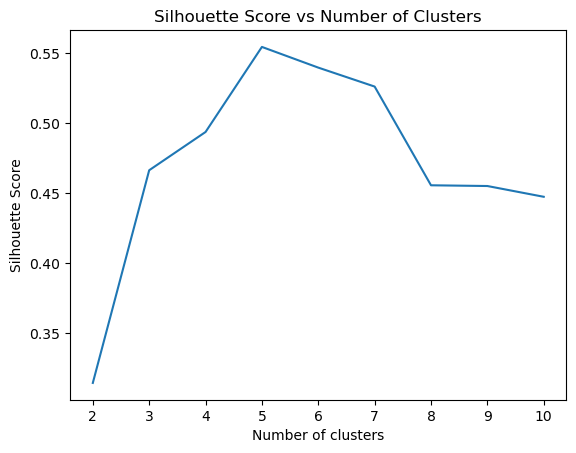

In [35]:
# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [36]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)



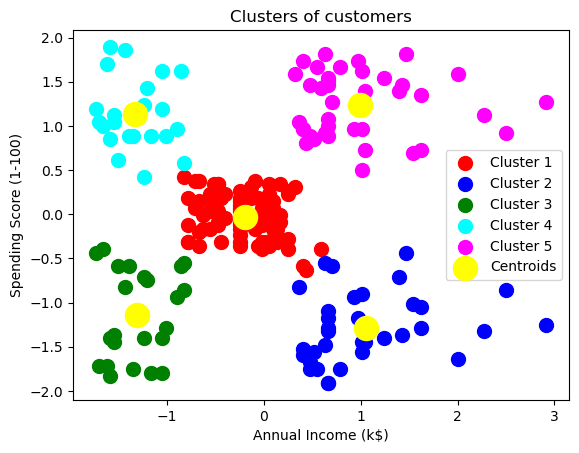

In [37]:
# Visualizing the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
